# Red Wine Project :-  DataTrained   |   Practice Project_3

## Problem Statement:

### Predict the quality using the features provided in the data. 

#### Submitted by: Tamali Saha (tamali428@gmail.com)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

In [2]:
# taking data from the given link on Github

data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#checking shape

data.shape

(1599, 12)

In [4]:
#checking null values

data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null value is present in the given dataset

In [5]:
#checking duplicate

data.duplicated().sum()

240

In [6]:
data.drop_duplicates(keep='first', inplace= True)

In [7]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
data.duplicated().sum()

0

In [9]:
#checking different statistical parameter

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


### Data description by overviewing the data describe method:

1. No null values are present.
2. All of the features have numarical data.
3. Target variable is quality and it has discrete data. So it is a Classification problem.
4. Seems outliers are present.
5. Seems some skewness are also present as there is a big jump between two quantile in different features.
6. Most of the cases there is a big difference between max and 75% quantile.
7. citric acid has 0 min value.

In [11]:
# checking column name

data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
# renaming column

data.columns= ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
               'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
               'pH', 'sulphates', 'alcohol', 'quality']
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


#### Initially no null value is present in this dataset. There is no categorical feature also. So lets find the initial prediction with the raw data.


## Initial predictions using linear models (For 6 different ML model)

### No hyperparameter tuning and Standarization technique for this steps

### Using LogisticRegression()

In [13]:
from sklearn.linear_model import LogisticRegression

x = data.drop(columns = ['quality'], axis=1)
y = data['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=200)

log = LogisticRegression()
log.fit(x_train, y_train)

y_pred = log.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))


accu score :  0.5470588235294118
cof_mat:  [[  0  10   7   0   0]
 [  0 102  31   2   0]
 [  0  57  83   1   0]
 [  0   4  35   1   0]
 [  0   0   6   1   0]]
classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        17
           5       0.59      0.76      0.66       135
           6       0.51      0.59      0.55       141
           7       0.20      0.03      0.04        40
           8       0.00      0.00      0.00         7

    accuracy                           0.55       340
   macro avg       0.26      0.27      0.25       340
weighted avg       0.47      0.55      0.50       340

-----------
-----------
Mean absolute error: 0.5088235294117647
Mean square error: 0.6205882352941177
Root mean square error: 0.787774228630334
R2 Score: 0.0909206107837548
-----------
-----------
training score :  0.5858684985279686
testing score :  0.5470588235294118


### Using DecisionTreeClassifier()

In [14]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.48823529411764705


cof_mat:  [[ 0  0  0  0  0  0]
 [ 3  2  4  7  1  0]
 [ 2  8 71 49  5  0]
 [ 0  3 46 77 14  1]
 [ 0  0  5 18 16  1]
 [ 0  0  1  4  2  0]]


classification report:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.15      0.12      0.13        17
           5       0.56      0.53      0.54       135
           6       0.50      0.55      0.52       141
           7       0.42      0.40      0.41        40
           8       0.00      0.00      0.00         7

    accuracy                           0.49       340
   macro avg       0.27      0.26      0.27       340
weighted avg       0.49      0.49      0.49       340

-----------
-----------
Mean absolute error: 0.6029411764705882
Mean square error: 0.7970588235294118
Root mean square error: 0.892781509401607
R2 Score: -0.16758537667110174
-----------
-----------
training score :  1.0
testing score :  0.48823529411764705


### Using KNeighborsClassifier()

In [15]:
from sklearn.neighbors import KNeighborsClassifier


knn =KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', knn.score(x_train, y_train))
print('testing score : ', knn.score(x_test, y_test))

accu score :  0.46176470588235297


cof_mat:  [[ 0 10  5  2  0]
 [ 1 94 39  1  0]
 [ 1 76 55  9  0]
 [ 1  9 22  8  0]
 [ 0  1  5  1  0]]


classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        17
           5       0.49      0.70      0.58       135
           6       0.44      0.39      0.41       141
           7       0.38      0.20      0.26        40
           8       0.00      0.00      0.00         7

    accuracy                           0.46       340
   macro avg       0.26      0.26      0.25       340
weighted avg       0.42      0.46      0.43       340

-----------
-----------
Mean absolute error: 0.6235294117647059
Mean square error: 0.8176470588235294
Root mean square error: 0.9042383860595221
R2 Score: -0.19774440854083508
-----------
-----------
training score :  0.6310107948969578
testing score :  0.46176470588235297


### Using GradientBoostingClassifier()

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.55


cof_mat:  [[ 0  0  0  0  0  0]
 [ 0  1 11  5  0  0]
 [ 0  4 95 34  1  1]
 [ 2  1 52 73 13  0]
 [ 0  0  3 19 18  0]
 [ 0  0  0  3  4  0]]


classification report:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.17      0.06      0.09        17
           5       0.59      0.70      0.64       135
           6       0.54      0.52      0.53       141
           7       0.50      0.45      0.47        40
           8       0.00      0.00      0.00         7

    accuracy                           0.55       340
   macro avg       0.30      0.29      0.29       340
weighted avg       0.53      0.55      0.54       340

-----------
-----------
Mean absolute error: 0.5058823529411764
Mean square error: 0.6352941176470588
Root mean square error: 0.7970533969860857
R2 Score: 0.06937844516251668
-----------
-----------
training score :  0.9097154072620216
testing score :  0.55


### Using MultinomialNB()

In [17]:
from sklearn.naive_bayes import MultinomialNB


mnb = MultinomialNB()
mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', mnb.score(x_train, y_train))
print('testing score : ', mnb.score(x_test, y_test))

accu score :  0.4117647058823529


cof_mat:  [[ 0  0  0  0  0  0]
 [ 1  0  3  6  5  2]
 [ 2  0 68 33 29  3]
 [ 0  0 43 60 28 10]
 [ 0  0  7 16 11  6]
 [ 0  0  2  3  1  1]]


classification report:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        17
           5       0.55      0.50      0.53       135
           6       0.51      0.43      0.46       141
           7       0.15      0.28      0.19        40
           8       0.05      0.14      0.07         7

    accuracy                           0.41       340
   macro avg       0.21      0.22      0.21       340
weighted avg       0.45      0.41      0.43       340

-----------
-----------
Mean absolute error: 0.8323529411764706
Mean square error: 1.4147058823529413
Root mean square error: 1.1894140920440373
R2 Score: -1.0723563327630994
-----------
-----------
training score :  0.4278704612365064
testing score :  0.4117

### Using RandomForestClassifier()

In [18]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.5764705882352941


cof_mat:  [[ 0  0  0  0  0  0]
 [ 1  0  9  7  0  0]
 [ 0  1 94 38  2  0]
 [ 0  1 46 88  6  0]
 [ 0  0  2 24 14  0]
 [ 0  0  0  2  5  0]]


classification report:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        17
           5       0.62      0.70      0.66       135
           6       0.55      0.62      0.59       141
           7       0.52      0.35      0.42        40
           8       0.00      0.00      0.00         7

    accuracy                           0.58       340
   macro avg       0.28      0.28      0.28       340
weighted avg       0.54      0.58      0.55       340

-----------
-----------
Mean absolute error: 0.4647058823529412
Mean square error: 0.5470588235294118
Root mean square error: 0.7396342498352898
R2 Score: 0.19863143888994494
-----------
-----------
training score :  1.0
testing score :  0.5764705882352941


### Check Data Distributions in details:

In [19]:
data["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

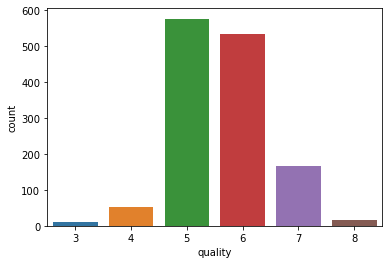

In [20]:
sns.countplot(data["quality"])

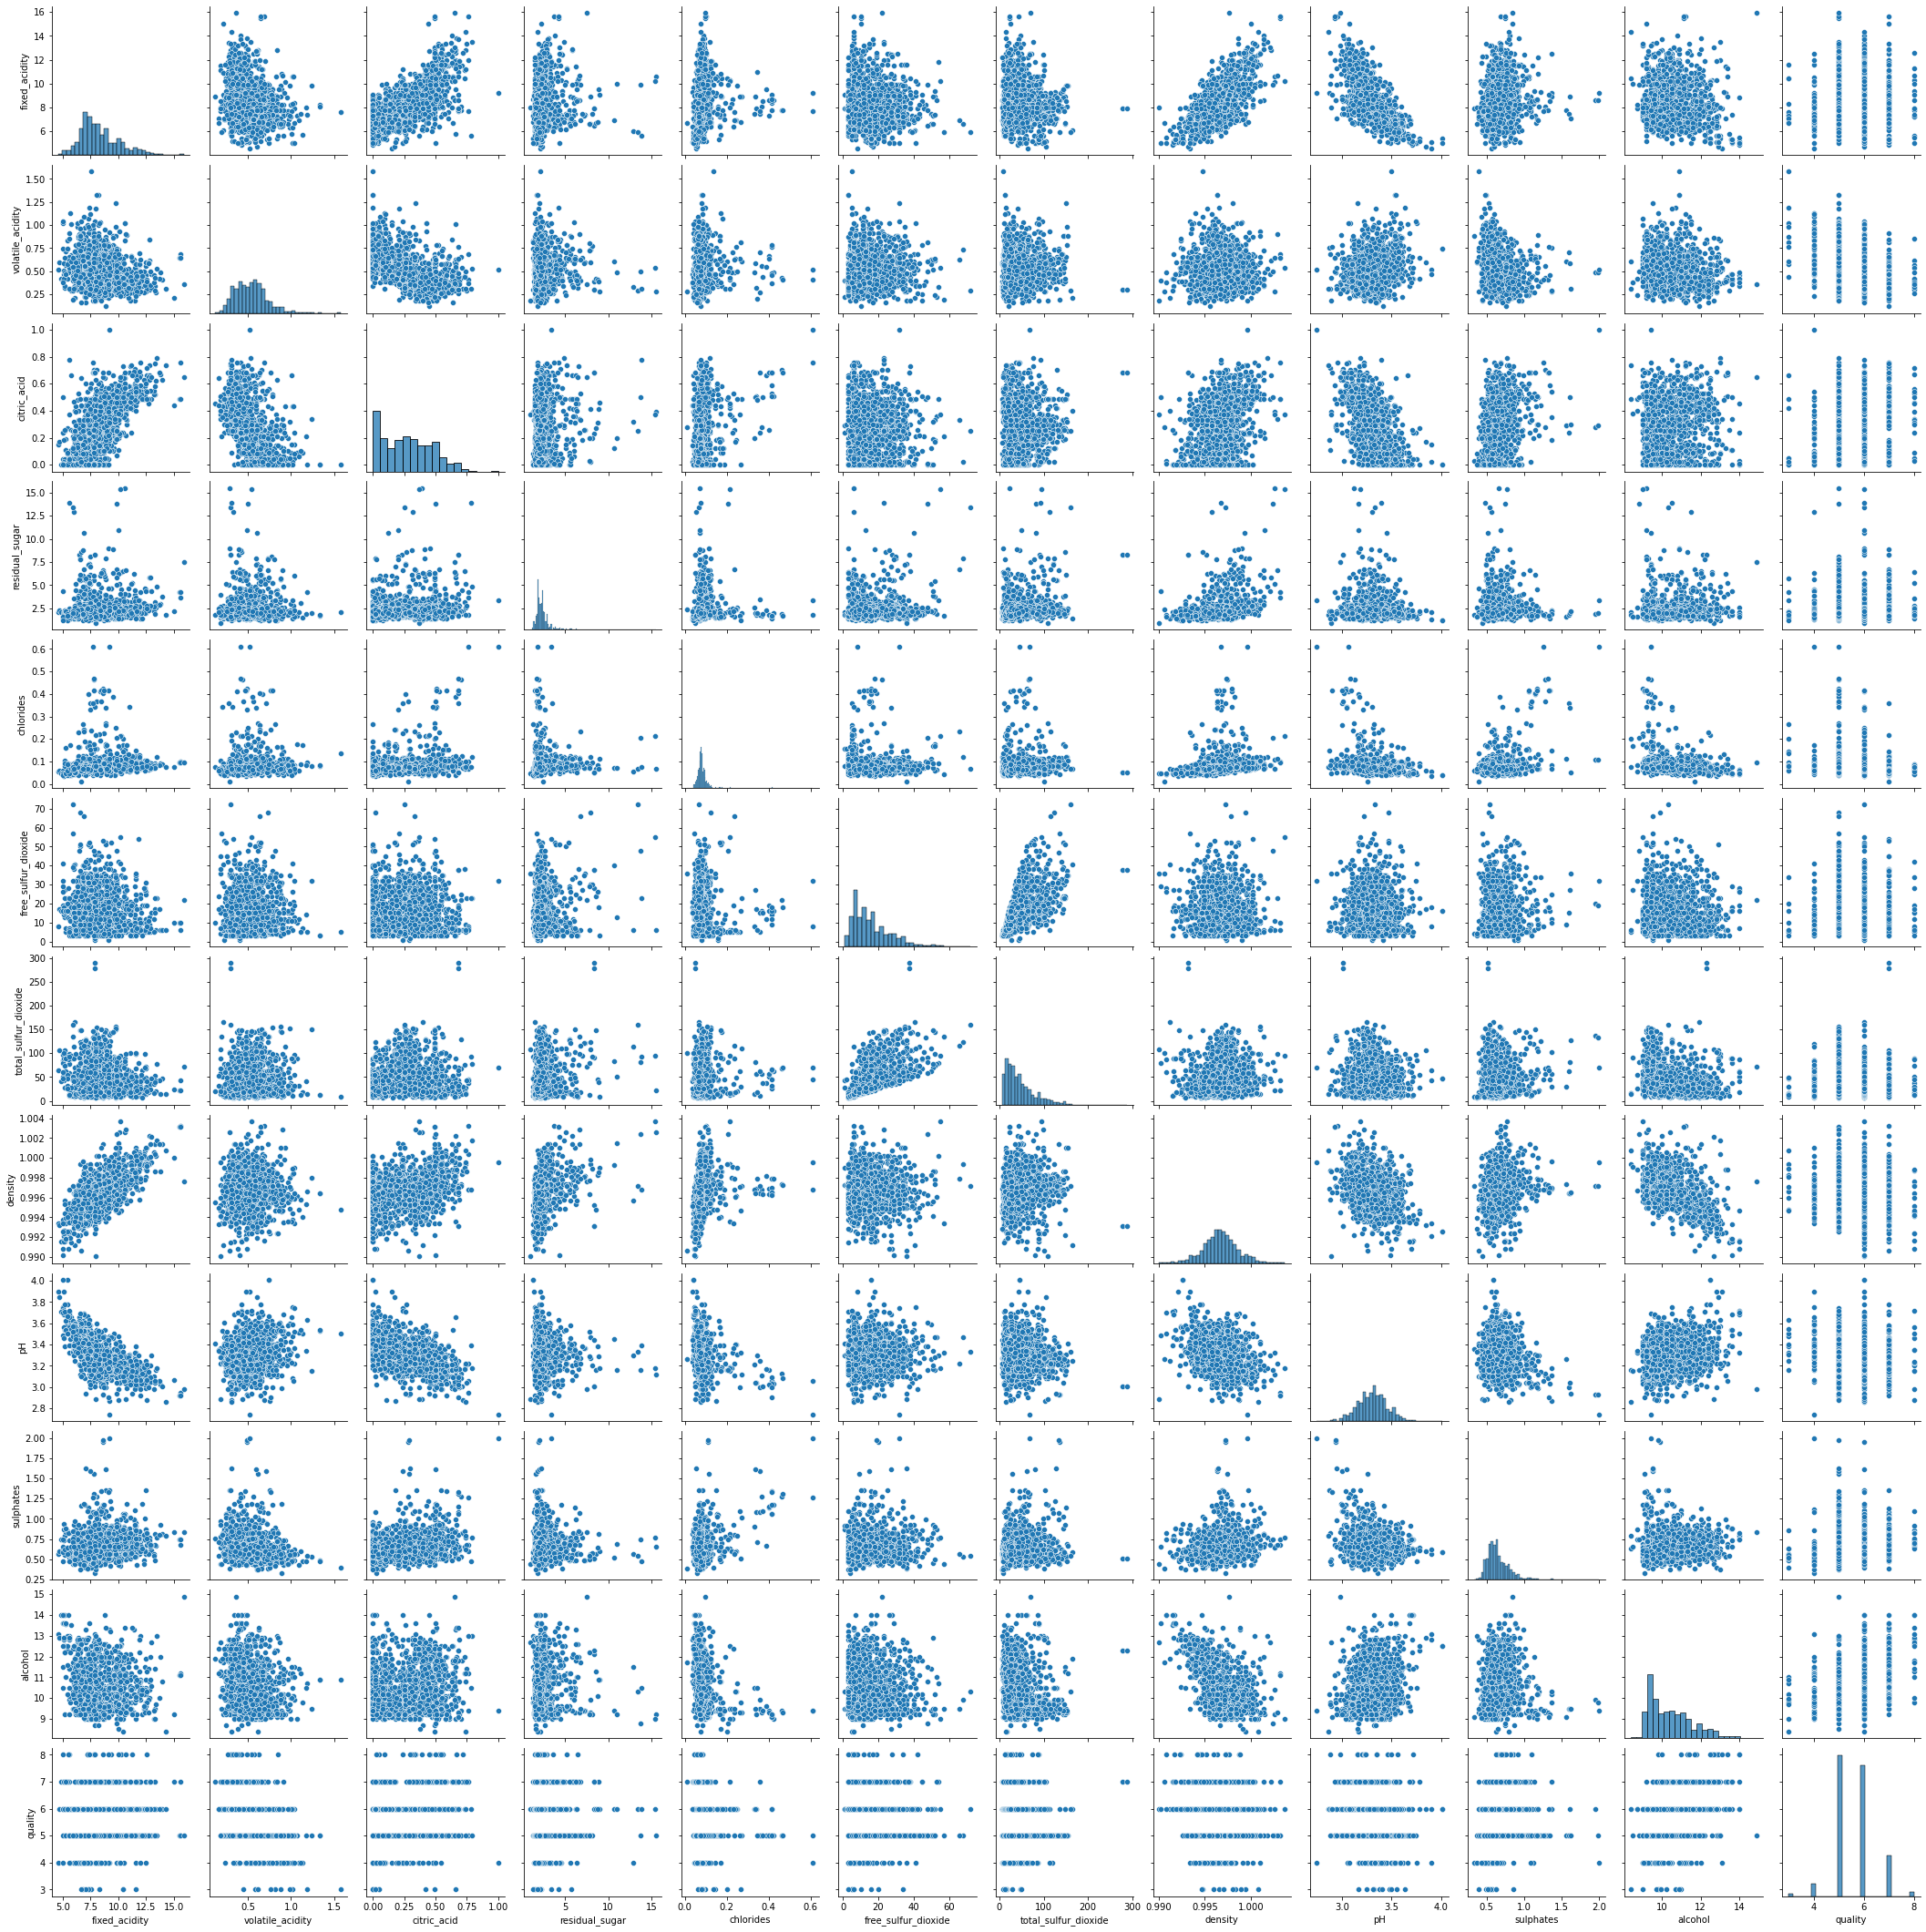

In [21]:
sns.pairplot(data)

<AxesSubplot:>

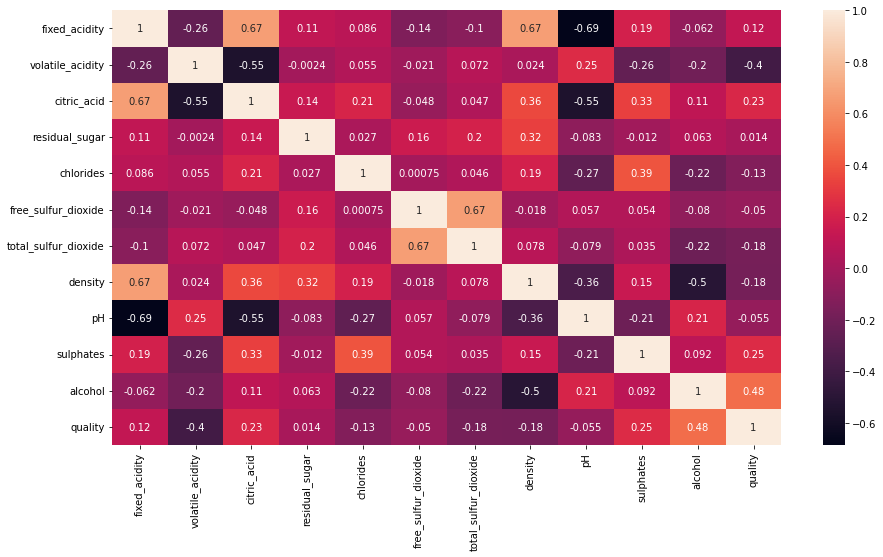

In [22]:
plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(),annot= True, linecolor='black')

array([[<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>],
       [<AxesSubplot:title={'center':'residual_sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}>],
       [<AxesSubplot:title={'center':'total_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

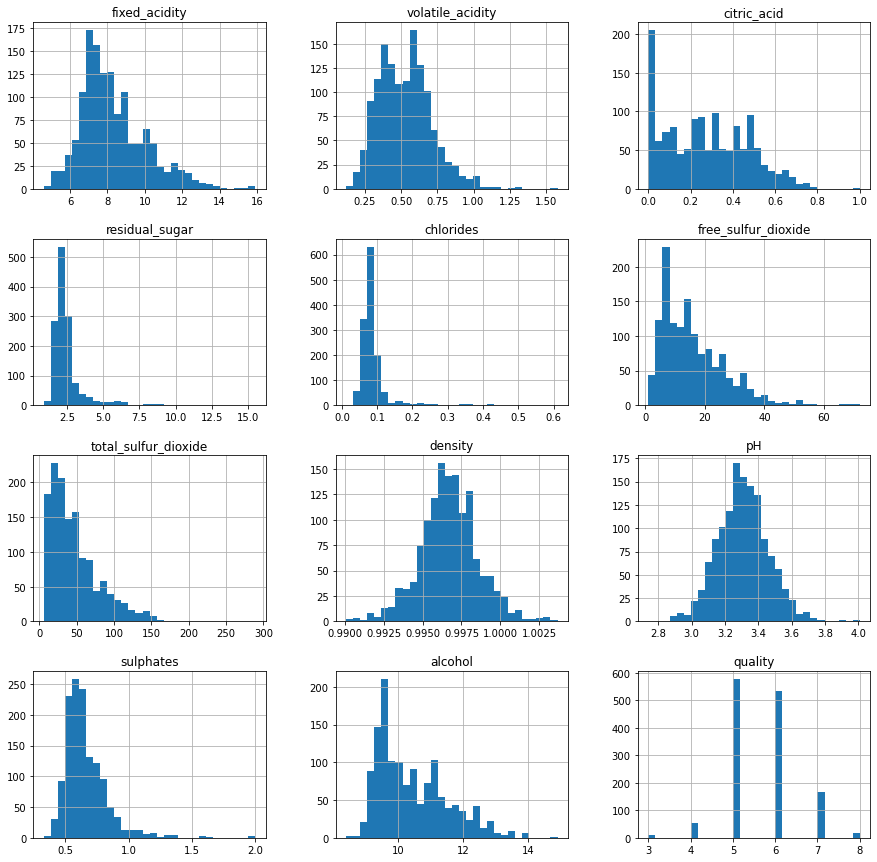

In [23]:
data.hist(figsize = (15,15), bins=30)

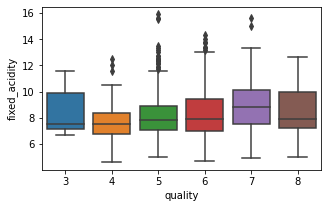

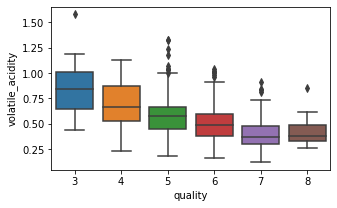

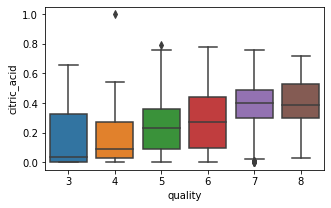

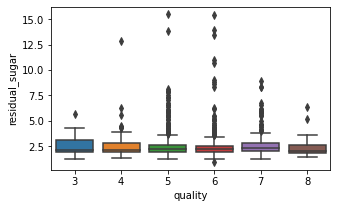

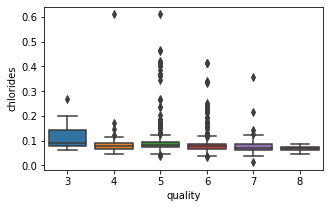

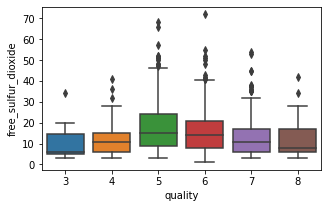

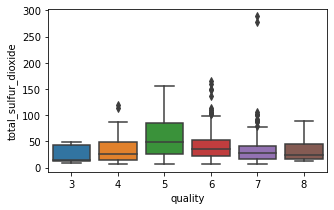

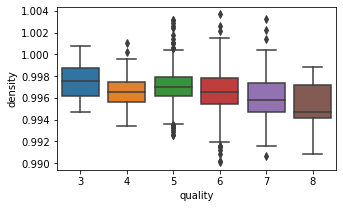

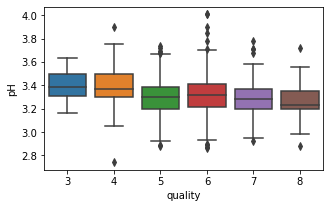

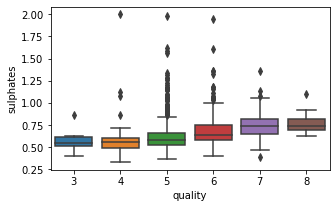

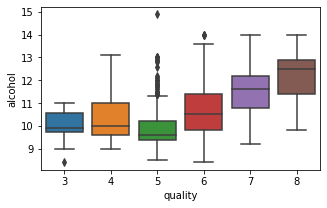

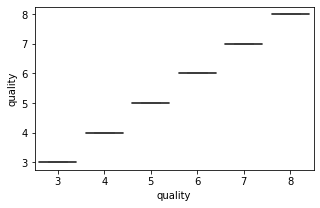

In [24]:
for i in data:
    fig = plt.figure(figsize = (5,3))
    sns.boxplot(x = data["quality"], y = data[i])

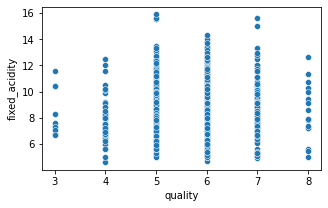

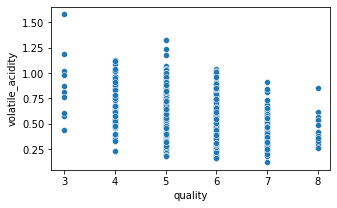

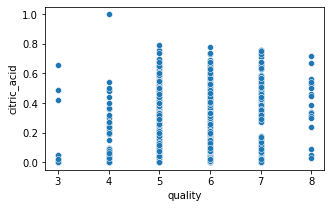

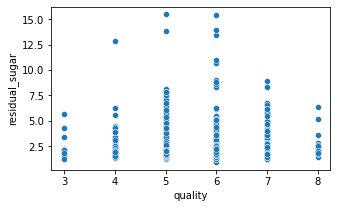

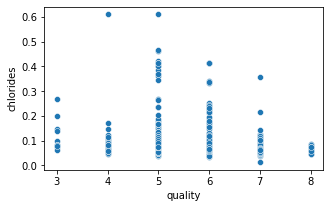

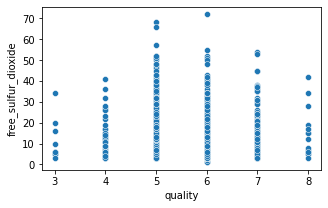

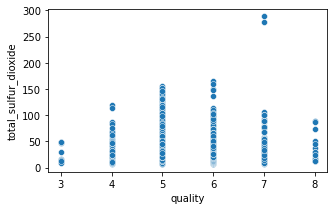

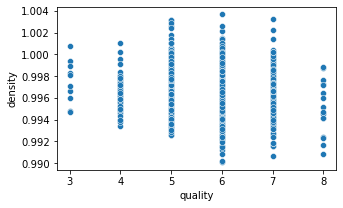

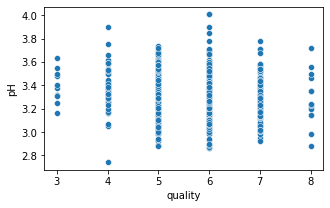

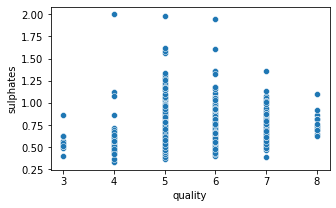

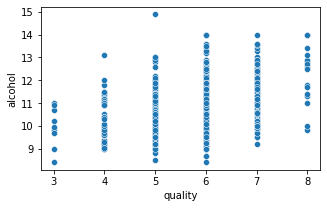

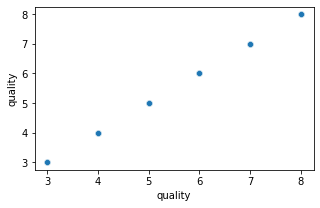

In [25]:
for i in data:
    fig = plt.figure(figsize = (5,3))
    sns.scatterplot(x = data["quality"], y = data[i] )

<Figure size 360x216 with 0 Axes>

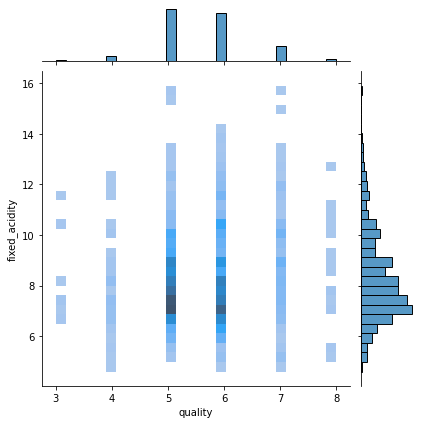

<Figure size 360x216 with 0 Axes>

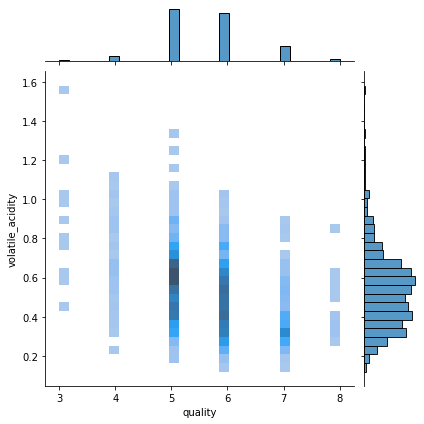

<Figure size 360x216 with 0 Axes>

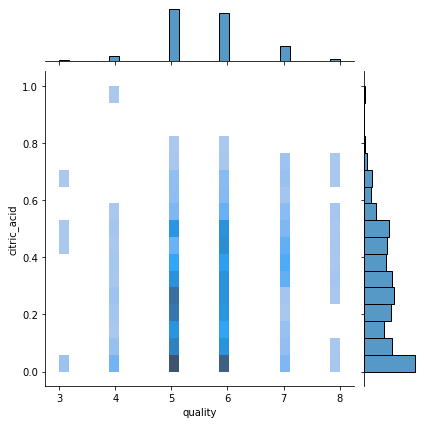

<Figure size 360x216 with 0 Axes>

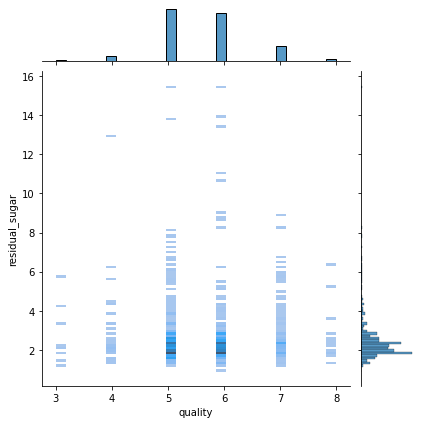

<Figure size 360x216 with 0 Axes>

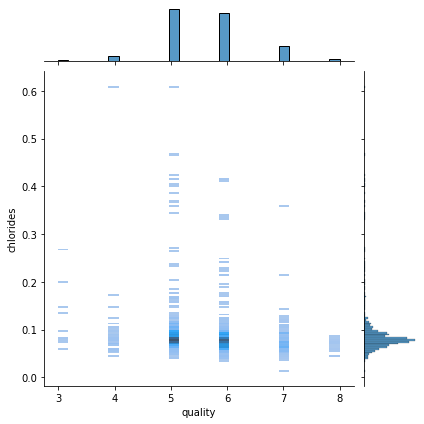

<Figure size 360x216 with 0 Axes>

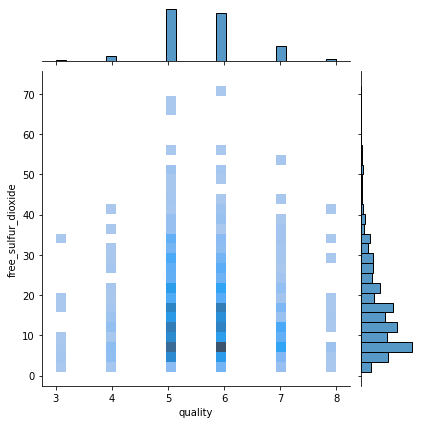

<Figure size 360x216 with 0 Axes>

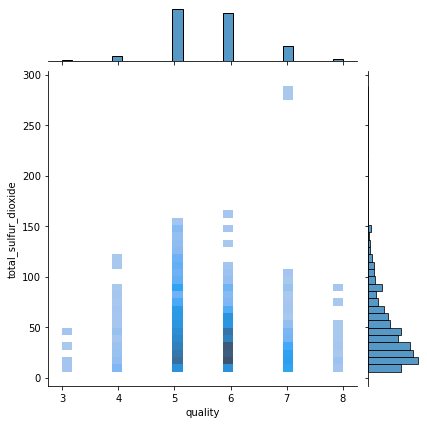

<Figure size 360x216 with 0 Axes>

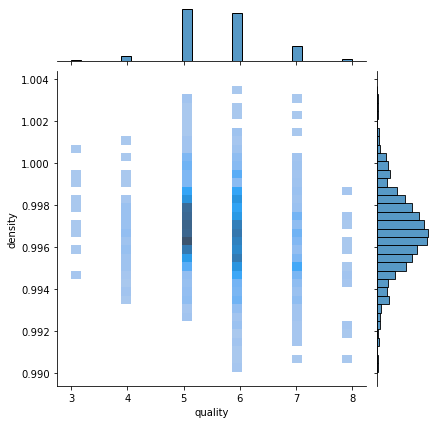

<Figure size 360x216 with 0 Axes>

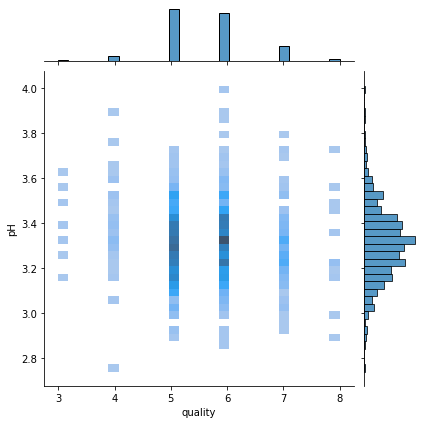

<Figure size 360x216 with 0 Axes>

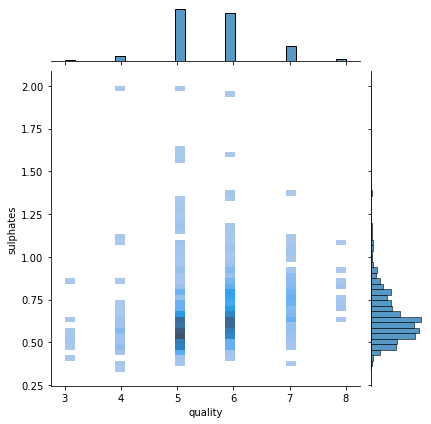

<Figure size 360x216 with 0 Axes>

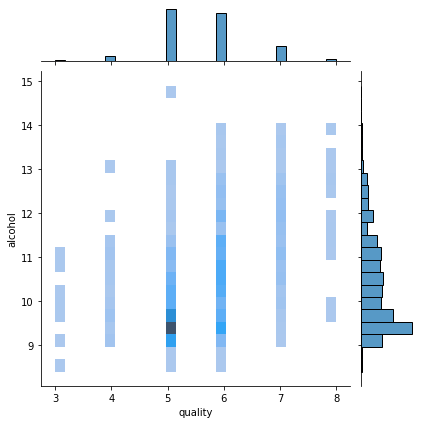

<Figure size 360x216 with 0 Axes>

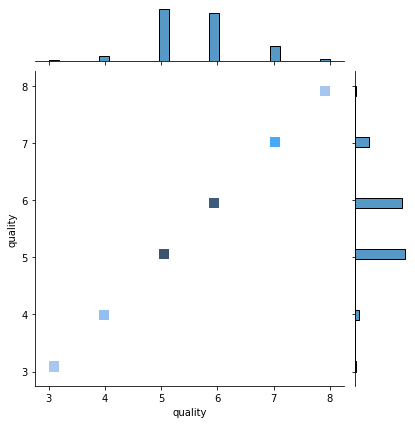

In [26]:
for i in data:
    fig = plt.figure(figsize = (5,3))
    sns.jointplot(x = data["quality"], y = data[i], kind="hist")

fixed_acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
volatile_acidity        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
citric_acid             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
residual_sugar          AxesSubplot(0.731522,0.657941;0.168478x0.222059)
chlorides                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
free_sulfur_dioxide     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
total_sulfur_dioxide    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.731522,0.391471;0.168478x0.222059)
pH                            AxesSubplot(0.125,0.125;0.168478x0.222059)
sulphates                  AxesSubplot(0.327174,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

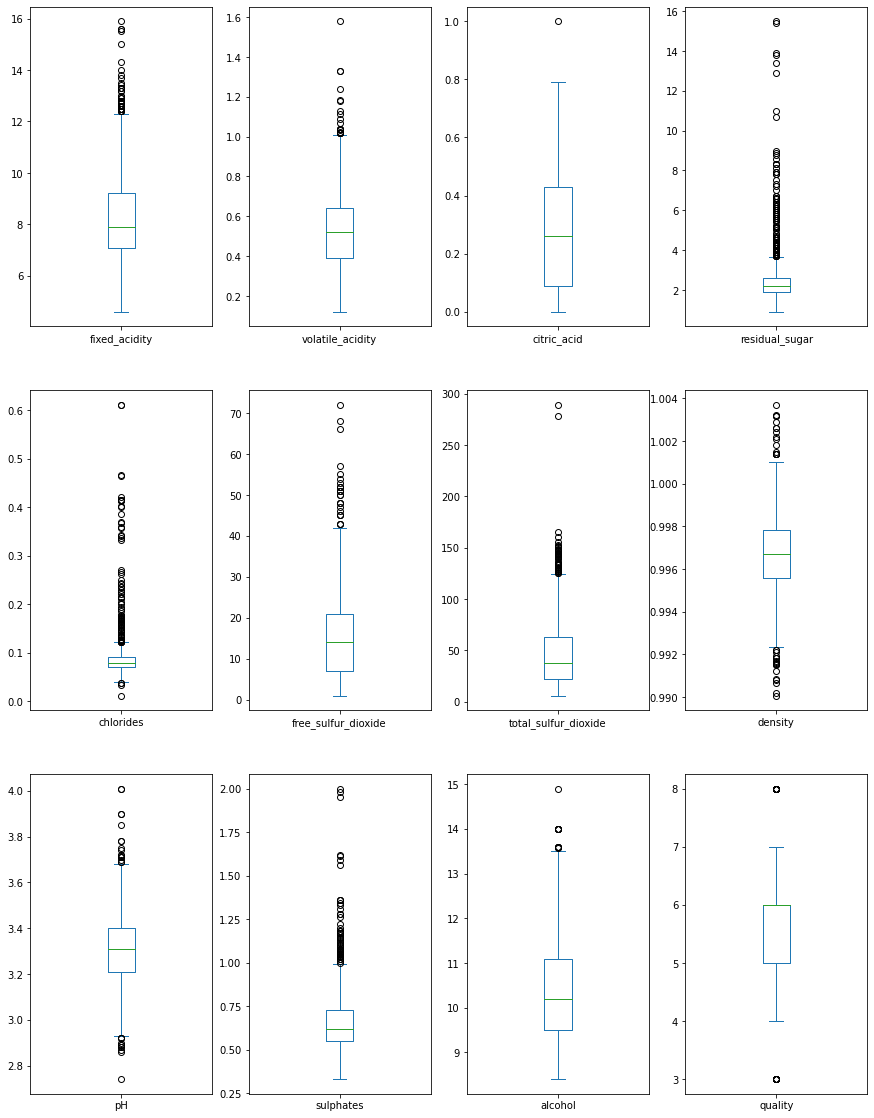

In [27]:
data.plot(kind ='box', subplots =True , layout =(3,4), figsize = (15,20))

Too much outliers are present in features like fixed_acidity, volatile_acidity, residual_sugar,	chlorides, free_sulfur_dioxide, density, pH, sulphates

Lets take the zscore and assumed that any data value which is greater than zscore value 3 are outliers. By this way we try to minimize the overall skewness as well as outliers.

### Remove outliers

In [28]:
from scipy.stats import zscore
z = np.abs(zscore(data))

In [29]:
print(np.where(z>3)) 

(array([  11,   12,   13,   13,   15,   15,   17,   30,   35,   38,   39,
         41,   53,   75,   75,   77,   80,   82,   85,   87,   96,   96,
         99,  114,  115,  127,  135,  135,  135,  135,  144,  145,  150,
        150,  159,  176,  202,  202,  211,  214,  226,  226,  241,  245,
        252,  282,  295,  296,  302,  309,  328,  334,  346,  346,  361,
        363,  385,  385,  393,  400,  408,  420,  420,  433,  448,  450,
        473,  483,  483,  485,  485,  492,  506,  510,  513,  516,  528,
        534,  555,  562,  562,  564,  565,  565,  565,  582,  582,  592,
        597,  597,  599,  602,  626,  627,  632,  652,  671,  672,  687,
        710,  718,  722,  764,  764,  771,  781,  786,  791,  792,  838,
        866,  888,  895,  895,  912,  918,  918,  920,  920,  945,  948,
        963,  985,  994, 1003, 1013, 1049, 1052, 1060, 1060, 1060, 1073,
       1081, 1081, 1082, 1082, 1103, 1106, 1106, 1107, 1117, 1121, 1123,
       1123, 1125, 1151, 1159, 1162, 1165, 1165, 1

In [30]:
data_new = data[(z<3).all(axis = 1)]
data_new

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


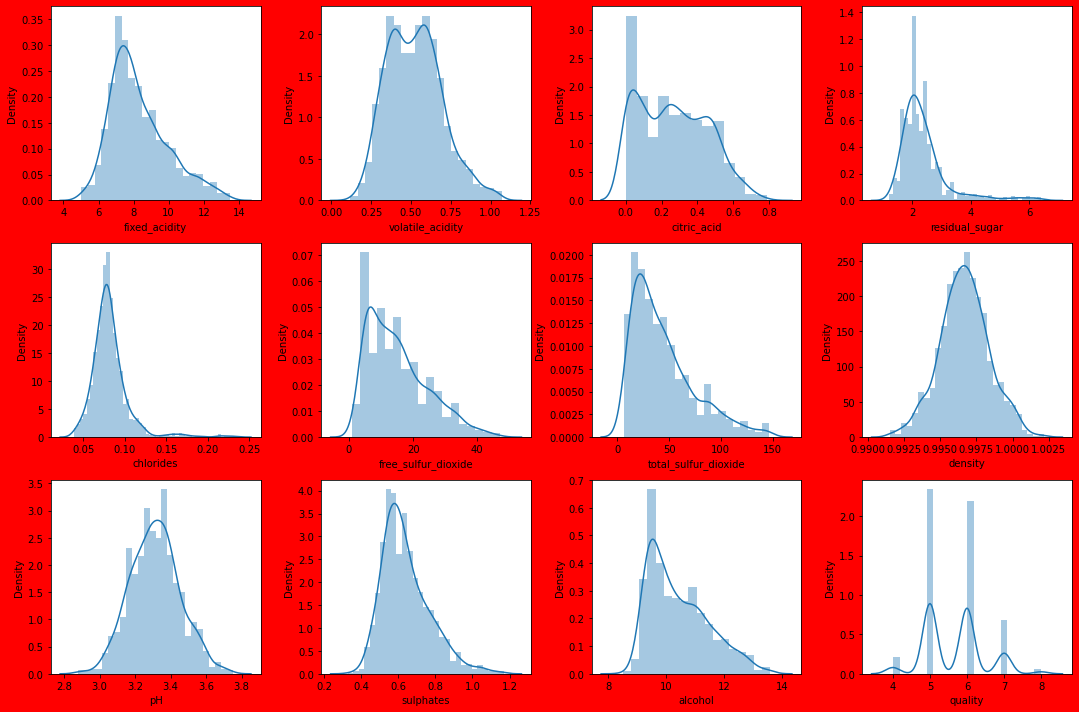

In [31]:
#checking skewness 

plt.figure(figsize=(15,10),facecolor='red')
plno=1
for x in data_new:
    if plno<=12:
        plt.subplot(3,4,plno)
        sns.distplot(data_new[x])
        plt.xlabel (x, fontsize=10)
    plno +=1
plt.tight_layout()

fixed_acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
volatile_acidity        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
citric_acid             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
residual_sugar          AxesSubplot(0.731522,0.657941;0.168478x0.222059)
chlorides                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
free_sulfur_dioxide     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
total_sulfur_dioxide    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.731522,0.391471;0.168478x0.222059)
pH                            AxesSubplot(0.125,0.125;0.168478x0.222059)
sulphates                  AxesSubplot(0.327174,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

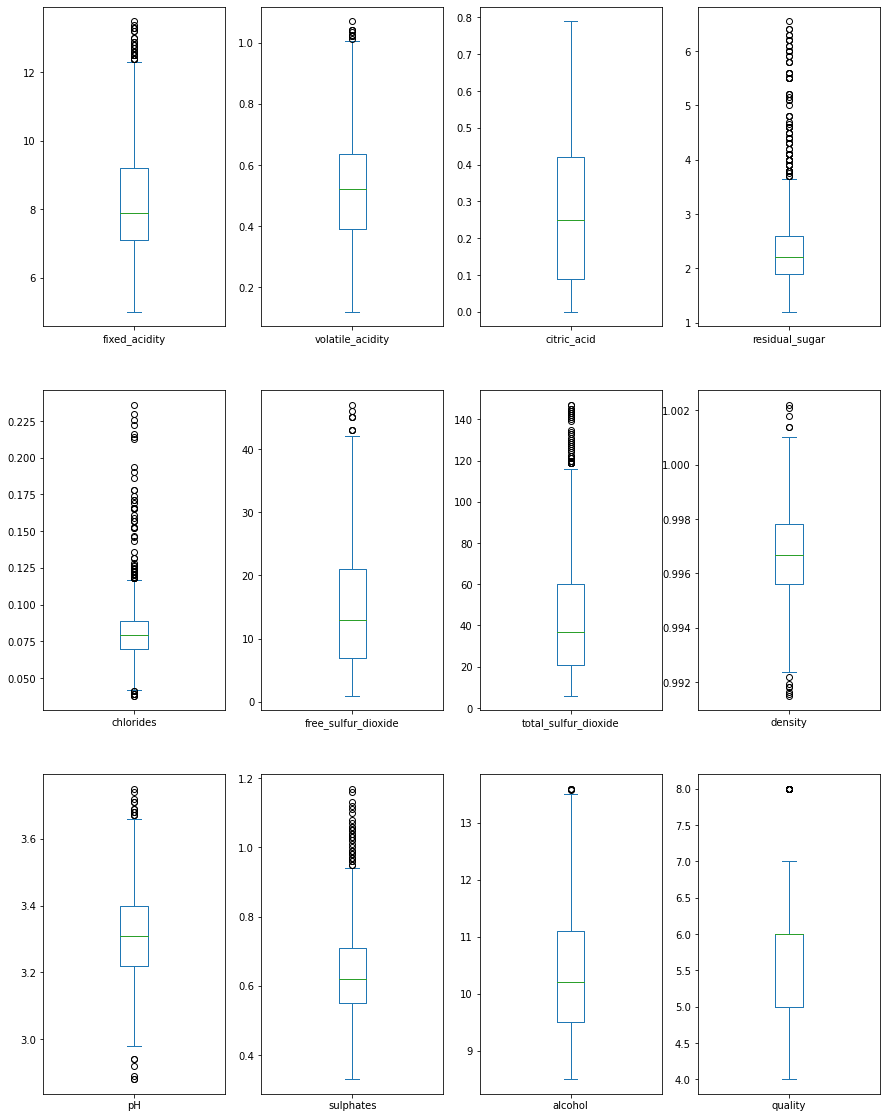

In [32]:
data_new.plot(kind ='box', subplots =True , layout =(3,4), figsize = (15,20))

#### Remove outliers individually

In [33]:
#1st quantile
q1= data_new. quantile(0.25)
#3rd quantile
q3= data_new. quantile(0.75)
#IQR
iqr= q3-q1

In [34]:
# determine higher value (residual_sugar_h) from residual_sugar column using IQR 

residual_sugar_h=(q3.residual_sugar+(1.5*iqr.residual_sugar))

# Extract the index no of the data for which the residual_sugar value is higher than residual_sugar_h

index=np.where(data_new['residual_sugar']>residual_sugar_h)

#Drop the data with the specified index number

data_new=data_new.drop(data_new.index[index])

#Reset the index number

data_new.reset_index()

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1144,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1145,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1146,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [35]:
# determine higher value (chlorides_h) from chlorides column using IQR 

chlorides_h=(q3.chlorides+(1.5*iqr.chlorides))

# Extract the index no of the data for which the chlorides value is higher than chlorides_h

index=np.where(data_new['chlorides']>chlorides_h)

#Drop the data with the specified index number

data_new=data_new.drop(data_new.index[index])

#Reset the index number

data_new.reset_index()

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1093,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1094,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1095,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [36]:
# determine higher value (total_sulfur_dioxide_h) from total_sulfur_dioxide column using IQR 

total_sulfur_dioxide_h=(q3.total_sulfur_dioxide+(1.5*iqr.total_sulfur_dioxide))

# Extract the index no of the data for which the total_sulfur_dioxide value is higher than total_sulfur_dioxide_h

index=np.where(data_new['total_sulfur_dioxide']>total_sulfur_dioxide_h)

#Drop the data with the specified index number

data_new=data_new.drop(data_new.index[index])

#Reset the index number

data_new.reset_index()

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1058,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1059,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1060,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [37]:
# determine higher value (sulphates_h) from sulphates column using IQR 

sulphates_h=(q3.sulphates+(1.5*iqr.sulphates))

# Extract the index no of the data for which the sulphates value is higher than sulphates_h

index=np.where(data_new['sulphates']>sulphates_h)

#Drop the data with the specified index number

data_new=data_new.drop(data_new.index[index])

#Reset the index number

data_new.reset_index()

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1037,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1038,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1039,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


fixed_acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
volatile_acidity        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
citric_acid             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
residual_sugar          AxesSubplot(0.731522,0.657941;0.168478x0.222059)
chlorides                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
free_sulfur_dioxide     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
total_sulfur_dioxide    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.731522,0.391471;0.168478x0.222059)
pH                            AxesSubplot(0.125,0.125;0.168478x0.222059)
sulphates                  AxesSubplot(0.327174,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

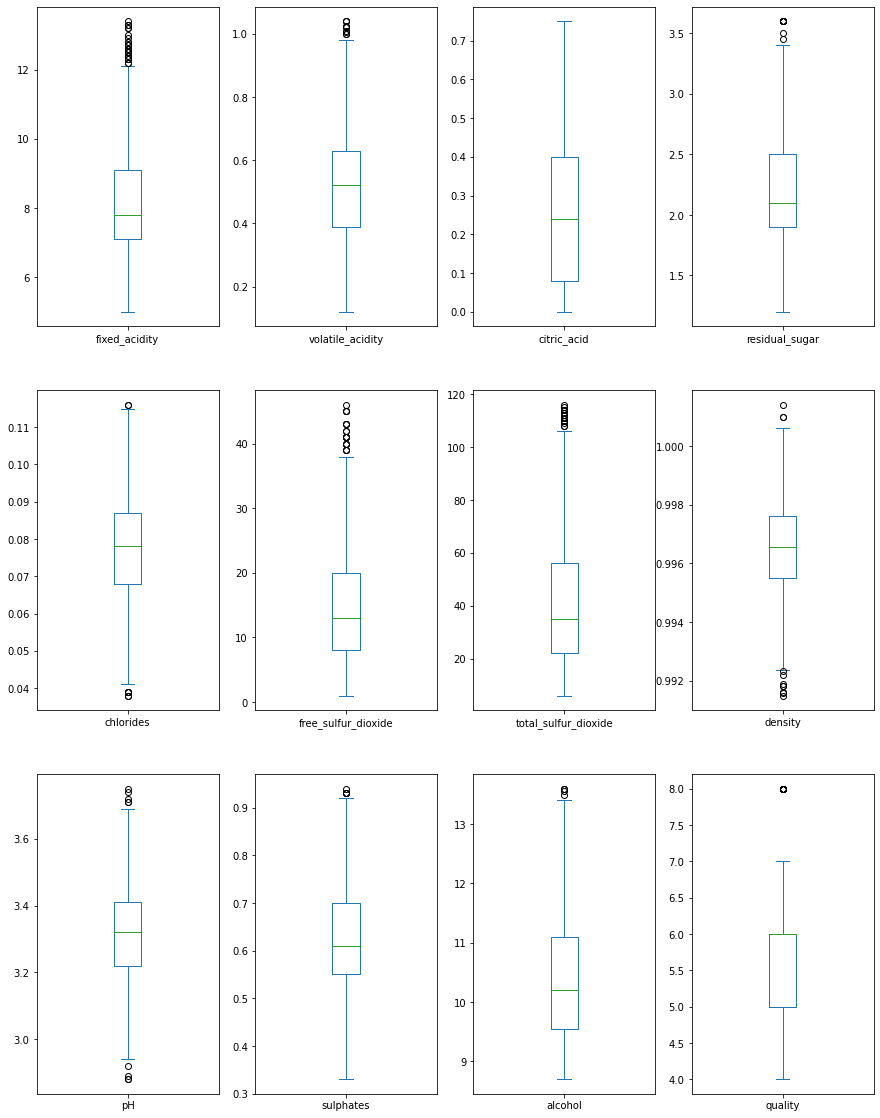

In [38]:
data_new.plot(kind ='box', subplots =True , layout =(3,4), figsize = (15,20))

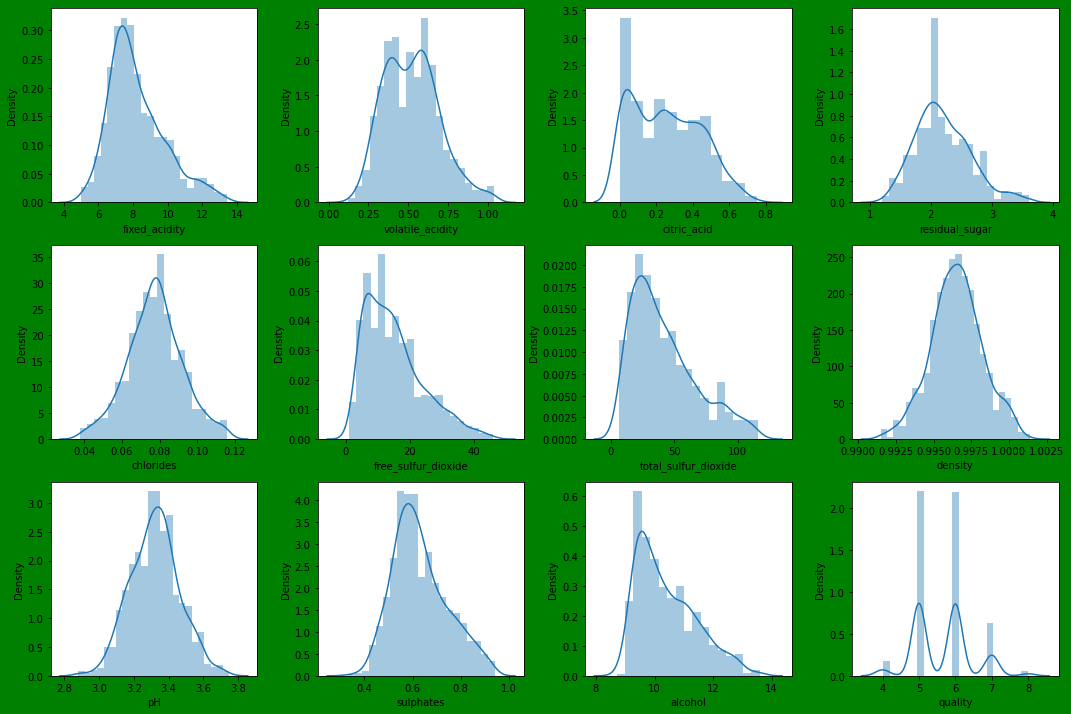

In [39]:
#checking skewness 

plt.figure(figsize=(15,10),facecolor='green')
plno=1
for x in data_new:
    if plno<=12:
        plt.subplot(3,4,plno)
        sns.distplot(data_new[x])
        plt.xlabel (x, fontsize=10)
    plno +=1
plt.tight_layout()

#### Overall outliers and skewness are deleted from the dataset. 
Some outliers are still present but its ok. 

### Check Multicollinearity problem:

In [40]:
scaler= StandardScaler()

x = data_new.drop(columns = ['quality'], axis=1)
y = data_new['quality']

x_scale= scaler.fit_transform(x)
x_scale.shape

(1041, 11)

In [41]:
vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(x_scale,i)for i in range(x_scale.shape[1])]
vif["Features"] = x.columns
vif

,VIF,Features
0,8.178733,fixed_acidity
1,1.896752,volatile_acidity
2,3.122306,citric_acid
3,1.714005,residual_sugar
4,1.368018,chlorides
5,1.834369,free_sulfur_dioxide
6,2.058205,total_sulfur_dioxide
7,7.639657,density
8,3.436748,pH
9,1.356712,sulphates


Reject the features for which the VIF value is greater than 5. 

So drop the features fixed_acidity and density.

In [42]:
data_new.drop(columns = ['fixed_acidity','density'], axis=1, inplace= True)

In [43]:
data_new.columns

Index(['volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

### Check Data Standarization:

In [44]:
#data_new["quality"].value_counts()

5    436
6    433
7    124
4     36
8     12
Name: quality, dtype: int64

In [ ]:
#import six
#import joblib
#import sys
#sys.modules['sklearn.externals.six']= six
#sys.modules['sklearn.externals.joblib']= joblib

In [ ]:
#from imblearn import under_sampling, over_sampling
#from imblearn.over_sampling import SMOTE
#from collections import Counter


In [44]:
#data standarization
from sklearn.preprocessing import MinMaxScaler
minscaler= MinMaxScaler()

x= data_new.drop('quality', axis=1)
y= data_new["quality"]

x_scale = minscaler.fit_transform(x)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.25, random_state=200)

In [130]:
#ove_smp = SMOTE()

#x_train_ns, y_train_ns = ove_smp.fit_sample(x_train, y_train)

#print(Counter(y_train))
#print(Counter(y_train_ns))

Counter({6: 322, 5: 322, 7: 101, 4: 25, 8: 10})
Counter({4: 322, 6: 322, 7: 322, 5: 322, 8: 322})


## Final predictions using different Classification ML Models 

### Using LogisticRegression()

In [46]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.5938697318007663
cof_mat:  [[ 0  8  3  0  0]
 [ 0 76 38  0  0]
 [ 0 32 74  5  0]
 [ 0  1 17  5  0]
 [ 0  0  1  1  0]]
classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.65      0.67      0.66       114
           6       0.56      0.67      0.61       111
           7       0.45      0.22      0.29        23
           8       0.00      0.00      0.00         2

    accuracy                           0.59       261
   macro avg       0.33      0.31      0.31       261
weighted avg       0.56      0.59      0.57       261

-----------
-----------
Mean absolute error: 0.42528735632183906
Mean square error: 0.46360153256704983
Root mean square error: 0.6808829066491902
R2 Score: 0.15667058320871607
-----------
-----------
training score :  0.6051282051282051
testing score :  0.5938697318007663


In [47]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear'],penalty=['l2','l1'],C=[100, 10, 1.0, 0.1, 0.01])

grid_log = GridSearchCV(estimator=log, param_grid= grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)

grid_log.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l2', 'l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [48]:
grid_log.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [49]:
grid_log_best = LogisticRegression(C= 100,penalty= 'l2', solver= 'newton-cg')

grid_log_best.fit(x_train, y_train)

LogisticRegression(C=100, solver='newton-cg')

In [50]:
y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.5823754789272031
cof_mat:  [[ 0  8  3  0  0]
 [ 0 77 37  0  0]
 [ 1 31 67 12  0]
 [ 0  1 14  8  0]
 [ 0  0  1  1  0]]
classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.66      0.68      0.67       114
           6       0.55      0.60      0.58       111
           7       0.38      0.35      0.36        23
           8       0.00      0.00      0.00         2

    accuracy                           0.58       261
   macro avg       0.32      0.33      0.32       261
weighted avg       0.55      0.58      0.57       261

-----------
-----------
Mean absolute error: 0.44061302681992337
Mean square error: 0.48659003831417624
Root mean square error: 0.697560060721782
R2 Score: 0.11485259559923089
-----------
-----------
training score :  0.6115384615384616
testing score :  0.5823754789272031


#### No such variation found between two different approch with LogisticRegression()

### Using DecisionTreeClassifier()

In [51]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.4559386973180077


cof_mat:  [[ 0 10  1  0  0]
 [ 3 63 39  9  0]
 [ 3 35 49 23  1]
 [ 1  2 10  7  3]
 [ 0  0  1  1  0]]


classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.57      0.55      0.56       114
           6       0.49      0.44      0.46       111
           7       0.17      0.30      0.22        23
           8       0.00      0.00      0.00         2

    accuracy                           0.46       261
   macro avg       0.25      0.26      0.25       261
weighted avg       0.47      0.46      0.46       261

-----------
-----------
Mean absolute error: 0.6168582375478927
Mean square error: 0.7701149425287356
Root mean square error: 0.8775619308793742
R2 Score: -0.40090258491775277
-----------
-----------
training score :  1.0
testing score :  0.4559386973180077


In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param = {'criterion' : ['gini', 'entropy'],
    'min_samples_split' : range(1,4),
    'min_samples_leaf' : range(1,5),
        'ccp_alpha': [0.1, .01, .001],
        'max_features': ['auto', 'sqrt', 'log2']}

In [55]:
grid_search = GridSearchCV(estimator = clf,
                           cv=7,
                          param_grid = param, 
                          n_jobs  = -1)

In [56]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 4)})

In [57]:
best_params = grid_search.best_params_
best_params

{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [58]:
clfgrid = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=3, min_samples_leaf=1, ccp_alpha= 0.01, max_features= 'log2')

clfgrid.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_features='log2',
                       min_samples_split=3)

In [59]:
y_pred = clfgrid.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', clfgrid.score(x_train, y_train))
print('testing score : ', clfgrid.score(x_test, y_test))

accu score :  0.5823754789272031


cof_mat:  [[ 1  5  5  0  0]
 [ 1 76 33  4  0]
 [ 2 30 70  8  1]
 [ 1  1 16  5  0]
 [ 0  0  1  1  0]]


classification report:                precision    recall  f1-score   support

           4       0.20      0.09      0.13        11
           5       0.68      0.67      0.67       114
           6       0.56      0.63      0.59       111
           7       0.28      0.22      0.24        23
           8       0.00      0.00      0.00         2

    accuracy                           0.58       261
   macro avg       0.34      0.32      0.33       261
weighted avg       0.57      0.58      0.57       261

-----------
-----------
Mean absolute error: 0.4789272030651341
Mean square error: 0.6091954022988506
Root mean square error: 0.7805097067294234
R2 Score: -0.10817667165135658
-----------
-----------
training score :  0.65
testing score :  0.5823754789272031


#### 'clfgrid' gives better result using DecisionTreeClassifier()

### Using KNeighborsClassifier()

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier(n_neighbors=10, leaf_size=50, algorithm="ball_tree")
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', knn.score(x_train, y_train))
print('testing score : ', knn.score(x_test, y_test))

accu score :  0.5708812260536399


cof_mat:  [[ 0  6  5  0  0]
 [ 0 71 40  3  0]
 [ 0 34 67 10  0]
 [ 0  0 12 11  0]
 [ 0  0  1  1  0]]


classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.64      0.62      0.63       114
           6       0.54      0.60      0.57       111
           7       0.44      0.48      0.46        23
           8       0.00      0.00      0.00         2

    accuracy                           0.57       261
   macro avg       0.32      0.34      0.33       261
weighted avg       0.55      0.57      0.56       261

-----------
-----------
Mean absolute error: 0.46360153256704983
Mean square error: 0.5325670498084292
Root mean square error: 0.7297719162919529
R2 Score: 0.03121662038026063
-----------
-----------
training score :  0.676923076923077
testing score :  0.5708812260536399


In [61]:
from sklearn.ensemble import BaggingClassifier
bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=10), bootstrap=True,
                          n_estimators=15, max_samples=0.8, oob_score=True, random_state=540)

bagging_knn.fit(x_train, y_train)

print("Bagging Score: ", bagging_knn.score(x_test, y_test))

y_pred = bagging_knn.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))


Bagging Score:  0.5747126436781609
accu score :  0.5747126436781609


cof_mat:  [[ 0  7  4  0  0]
 [ 0 68 43  3  0]
 [ 0 29 71 11  0]
 [ 0  0 12 11  0]
 [ 0  0  0  2  0]]


classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.65      0.60      0.62       114
           6       0.55      0.64      0.59       111
           7       0.41      0.48      0.44        23
           8       0.00      0.00      0.00         2

    accuracy                           0.57       261
   macro avg       0.32      0.34      0.33       261
weighted avg       0.55      0.57      0.56       261



In [62]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=10),bootstrap=False,
                          n_estimators=15, max_samples=0.8,  random_state=540)

pasting_knn.fit(x_train, y_train)

print("Pasting Score: ", pasting_knn.score(x_test, y_test))

y_pred = pasting_knn.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))



Pasting Score:  0.5555555555555556
accu score :  0.5555555555555556


cof_mat:  [[ 0  5  6  0  0]
 [ 0 67 44  3  0]
 [ 0 32 68 11  0]
 [ 0  0 13 10  0]
 [ 0  0  1  1  0]]


classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.64      0.59      0.61       114
           6       0.52      0.61      0.56       111
           7       0.40      0.43      0.42        23
           8       0.00      0.00      0.00         2

    accuracy                           0.56       261
   macro avg       0.31      0.33      0.32       261
weighted avg       0.54      0.56      0.54       261



In [63]:
from sklearn.model_selection import GridSearchCV
param = {'algorithm' : ['kd_tree','brute', 'ball_tree'],
             'leaf_size' : [30,42,50.20], 'n_jobs':[1,-1],
             'n_neighbors' : [3,7,9,5],'weights': ['uniform', 'distance']}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, n_jobs=-1, cv=10)

gridsearchknn.fit(x_train, y_train)


GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(algorithm='ball_tree', leaf_size=50,
                                            n_neighbors=10),
             n_jobs=-1,
             param_grid={'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                         'leaf_size': [30, 42, 50.2], 'n_jobs': [1, -1],
                         'n_neighbors': [3, 7, 9, 5],
                         'weights': ['uniform', 'distance']})

In [64]:
gridsearchknn.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'n_jobs': 1,
 'n_neighbors': 7,
 'weights': 'distance'}

In [65]:
knngrid = KNeighborsClassifier(algorithm ='kd_tree', leaf_size=30, n_neighbors = 7, n_jobs= 1,weights= 'distance' )
knngrid.fit(x_train,y_train)
y_pred = knngrid.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', knngrid.score(x_train, y_train))
print('testing score : ', knngrid.score(x_test, y_test))

accu score :  0.5363984674329502


cof_mat:  [[ 0  5  6  0  0]
 [ 0 67 42  5  0]
 [ 0 32 62 17  0]
 [ 0  1 11 11  0]
 [ 0  0  1  1  0]]


classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.64      0.59      0.61       114
           6       0.51      0.56      0.53       111
           7       0.32      0.48      0.39        23
           8       0.00      0.00      0.00         2

    accuracy                           0.54       261
   macro avg       0.29      0.32      0.31       261
weighted avg       0.52      0.54      0.53       261

-----------
-----------
Mean absolute error: 0.5134099616858238
Mean square error: 0.6130268199233716
Root mean square error: 0.7829602926862713
R2 Score: -0.11514633625293746
-----------
-----------
training score :  1.0
testing score :  0.5363984674329502


#### No such variation found between different approch with KNeighborsClassifier()

### Using GradientBoostingClassifier()

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.5632183908045977


cof_mat:  [[ 0  9  2  0  0]
 [ 2 76 35  1  0]
 [ 0 31 63 17  0]
 [ 0  1 13  8  1]
 [ 0  0  1  1  0]]


classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.65      0.67      0.66       114
           6       0.55      0.57      0.56       111
           7       0.30      0.35      0.32        23
           8       0.00      0.00      0.00         2

    accuracy                           0.56       261
   macro avg       0.30      0.32      0.31       261
weighted avg       0.54      0.56      0.55       261

-----------
-----------
Mean absolute error: 0.4559386973180077
Mean square error: 0.4942528735632184
Root mean square error: 0.7030312038332427
R2 Score: 0.10091326639606912
-----------
-----------
training score :  0.9256410256410257
testing score :  0.5632183908045977


In [67]:
#hyperparameter tuning
from sklearn. model_selection import GridSearchCV

param= {"min_samples_split" : [2,1,3], "max_depth":[3,5,7], "learning_rate": [0.1,0.01], 
        "n_estimators": [100,102,80],"min_samples_leaf" :[1,2]}

grid= GridSearchCV(gbdt, param_grid= param)


#### This particular line is not executed in my system
#### so lets take 'gbdt'

### Using SVC('rbf')

In [69]:
from sklearn.svm import SVC
def svmkernel(ker):
    svc = SVC(kernel = ker)
    svc.fit(x_train, y_train)
    svc.score(x_train, y_train)
    predsvc = svc.predict(x_test)
    print('accu score : ', accuracy_score(y_test, y_pred))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, y_pred))
    print("\n")
    print('classification report: ', classification_report(y_test, y_pred))
    
    print("-----------")
    print("-----------")
    
    print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
    print('Mean square error:', mean_squared_error(y_test, y_pred))
    print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
    print('R2 Score:', r2_score(y_test, y_pred))
    
    print("-----------")
    print("-----------")
    
    print('training score : ', svc.score(x_train, y_train))
    print('testing score : ', svc.score(x_test, y_test))

In [70]:
svmkernel('rbf')

accu score :  0.5632183908045977


cof_mat:  [[ 0  9  2  0  0]
 [ 2 76 35  1  0]
 [ 0 31 63 17  0]
 [ 0  1 13  8  1]
 [ 0  0  1  1  0]]


classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.65      0.67      0.66       114
           6       0.55      0.57      0.56       111
           7       0.30      0.35      0.32        23
           8       0.00      0.00      0.00         2

    accuracy                           0.56       261
   macro avg       0.30      0.32      0.31       261
weighted avg       0.54      0.56      0.55       261

-----------
-----------
Mean absolute error: 0.4559386973180077
Mean square error: 0.4942528735632184
Root mean square error: 0.7030312038332427
R2 Score: 0.10091326639606912
-----------
-----------
training score :  0.6858974358974359
testing score :  0.5747126436781609


### Using SVC('poly')

In [71]:
svmkernel('poly')

accu score :  0.5632183908045977


cof_mat:  [[ 0  9  2  0  0]
 [ 2 76 35  1  0]
 [ 0 31 63 17  0]
 [ 0  1 13  8  1]
 [ 0  0  1  1  0]]


classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.65      0.67      0.66       114
           6       0.55      0.57      0.56       111
           7       0.30      0.35      0.32        23
           8       0.00      0.00      0.00         2

    accuracy                           0.56       261
   macro avg       0.30      0.32      0.31       261
weighted avg       0.54      0.56      0.55       261

-----------
-----------
Mean absolute error: 0.4559386973180077
Mean square error: 0.4942528735632184
Root mean square error: 0.7030312038332427
R2 Score: 0.10091326639606912
-----------
-----------
training score :  0.7025641025641025
testing score :  0.5747126436781609


### Using SVC('linear')

In [73]:
svmkernel('linear')

accu score :  0.5632183908045977


cof_mat:  [[ 0  9  2  0  0]
 [ 2 76 35  1  0]
 [ 0 31 63 17  0]
 [ 0  1 13  8  1]
 [ 0  0  1  1  0]]


classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.65      0.67      0.66       114
           6       0.55      0.57      0.56       111
           7       0.30      0.35      0.32        23
           8       0.00      0.00      0.00         2

    accuracy                           0.56       261
   macro avg       0.30      0.32      0.31       261
weighted avg       0.54      0.56      0.55       261

-----------
-----------
Mean absolute error: 0.4559386973180077
Mean square error: 0.4942528735632184
Root mean square error: 0.7030312038332427
R2 Score: 0.10091326639606912
-----------
-----------
training score :  0.5935897435897436
testing score :  0.6168582375478927


#### Between different SVC models, SVC("linear") gives better result.

### Using RandomForestClassifier()

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.5977011494252874


cof_mat:  [[ 0  9  2  0  0]
 [ 0 81 31  2  0]
 [ 0 27 66 18  0]
 [ 0  1 12  9  1]
 [ 0  0  1  1  0]]


classification report:                precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.69      0.71      0.70       114
           6       0.59      0.59      0.59       111
           7       0.30      0.39      0.34        23
           8       0.00      0.00      0.00         2

    accuracy                           0.60       261
   macro avg       0.32      0.34      0.33       261
weighted avg       0.58      0.60      0.59       261

-----------
-----------
Mean absolute error: 0.42528735632183906
Mean square error: 0.47126436781609193
Root mean square error: 0.6864869757075454
R2 Score: 0.1427312540055543
-----------
-----------
training score :  1.0
testing score :  0.5977011494252874


In [76]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators' : [100,80],
          'criterion' : ["gini", "entropy"],
         'min_samples_split' : [1,2,3],
         'min_samples_leaf' : [1,2]
         }

rf_grd = GridSearchCV(rf, param_grid = params, cv=7)

rf_grd.fit(x_train, y_train)

print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}


In [77]:
rf_best = rf_grd.best_estimator_
rf_best.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=80)

In [78]:
y_pred = rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', rf_best.score(x_train, y_train))
print('testing score : ', rf_best.score(x_test, y_test))

accu score :  0.5977011494252874


cof_mat:  [[ 0  9  2  0  0]
 [ 0 79 32  3  0]
 [ 0 26 70 15  0]
 [ 0  1 15  7  0]
 [ 0  0  1  1  0]]


classification report: 
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.69      0.69      0.69       114
           6       0.58      0.63      0.61       111
           7       0.27      0.30      0.29        23
           8       0.00      0.00      0.00         2

    accuracy                           0.60       261
   macro avg       0.31      0.33      0.32       261
weighted avg       0.57      0.60      0.58       261

-----------
-----------
Mean absolute error: 0.42911877394636017
Mean square error: 0.4827586206896552
Root mean square error: 0.6948083337796512
R2 Score: 0.12182226020081177
-----------
-----------
training score :  0.9615384615384616
testing score :  0.5977011494252874


#### Here rf_best is the better one with respect to another.

### Conclusion

#### As RandomForestClassifier() has a variation between training and testing score so here the acceptable model is LogisticRegression()

In [79]:
# making predictions on the test data
y_pred = log.predict(x_test)
y_pred

array([6, 5, 6, 5, 5, 5, 6, 5, 6, 7, 6, 7, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6,
       5, 5, 6, 7, 6, 6, 5, 6, 7, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 7, 6, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 6,
       6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6,
       5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 7, 5, 5, 5, 6, 6, 5, 6, 6,
       6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 7, 5, 7, 5, 6, 6, 5, 6, 6, 5, 6, 7, 5, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 7, 6, 5, 5, 5, 5, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6],
      dtype=int64)

### Load the model for future use

In [81]:
import pickle
pickle.dump(log, open("red_wine_classification_model", "wb"))

load_red_wine_classification_model= pickle.load(open("red_wine_classification_model", "rb"))

In [82]:
# Use "load_red_wine_classification_model" for nexttime use

load_red_wine_classification_model.score(x_test, y_test)

0.5938697318007663